# Análise da distribuição dos produtos no estoque

Gera o gráfico de dispersão das posições dos itens do estoque

### Importação dos dados e tratamento inicial dos dataframes

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from funcoes import curva_abc

In [2]:
path = 'dados/'
file = 'mon_04_06.xlsx'
file_mb52 = 'mb52_04_06.xlsx'
dados = pd.read_excel(path+file, usecols=('A:F,I:J') ,dtype={'Unidade comercial':'string'})

In [3]:
# Gera a curva ABC combinada
curva_abc(file, file_mb52)

c:\Users\mathe\OneDrive\Dados\estoque\análises\funcoes.py:139: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados['grupo'] = mb52['Material'].apply(lambda x: 'Acabado' if x in lista_acabados else 'na')
c:\Users\mathe\OneDrive\Dados\estoque\análises\funcoes.py:174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curva_combinada['inicial_item'] = curva_combinada['Material'].str[:2]
c:\Users\mathe\OneDrive\Dados\estoque\análises\funcoes.py:175: SettingWithCopyWarning: 
A value is trying to be set on a copy of a

'curva_combinada gerada sem gravação'

In [4]:
posicoes = pd.read_excel('dados/arquivos_base/Posicoes.xlsx')

In [5]:
# Utilizar as classificações abc geradas no arquivo 'analise_abc', possibilitando a escolha do tipo da classificação
# ex.: gerar gráfico pela classificação ABC por valor, ou por quantidade em estoque ou por quantidade de expedição
# CSV gerado no arquivo 'analise_abc'
classificacao = pd.read_csv('dados_csv/curva_combinada.csv', sep=',')
classificacao.head()

,Material,curva_qtd,curva_valor,tipo_item,tipo_produto
0,SA0274,A,A,stretch,acabado
1,SA0192,A,A,stretch,acabado
2,SA0166,A,A,stretch,acabado
3,SA0191,A,A,stretch,acabado
4,SA0163,A,A,stretch,acabado


In [6]:
# Renomear colunas
dados.rename(columns={
    'Posição no depósito':'posicao',
    'Produto':'produto',
    'Unidade comercial':'uc',
    'Lote':'lote',
    'Descrição breve do produto': 'descricao',
    'Quantidade':'quantidade',
    'Denominação do tipo de estoque':'tipo_estoque',
    'Data EM': 'data_em'
    }, inplace=True)
dados.sample(5)

,posicao,produto,uc,lote,descricao,quantidade,tipo_estoque,data_em
7268,F-39-3,SA0309,112345673000014017,0000846910,"PELICULA DE PLASTICO ST 420X0,008MM",144.20,Estoque utilização livre 005,2022-05-30
7260,F-27-6,SA0312,112345673000013920,0000843251,"PELICULA DE PLASTICO ST 420X0,008MM",146.00,Estoque utilização livre 005,2022-05-30
3308,C-16-4,SA0567,112345678001605724,0000479796,"PELICULA DE PLASTICO ST 1000X0,023MM",562.70,Estoque utilização livre 005,2022-05-03
9509,D-18-1,SA0063,112345678002098082,0000871848,"PELICULA DE PLASTICO ST 400X0,070MM VD",405.54,Estoque utilização livre 005,2022-06-03
9607,E-23-4,SZ0257,112345673000014511,0000869828,"PELICULA DE PLASTICO ST 500X0,025MM",404.00,Estoque utilização livre SA1,2022-06-03


In [7]:
dados = dados[['posicao', 'produto', 'tipo_estoque']]

In [8]:
# Renomear colunas
posicoes.rename(columns={
    'Pos':'posicao',
    'Tipo':'tipo'
    },inplace=True)
posicoes.sample(5)

,posicao,tipo
2045,E-44-1,Rack
2308,E-39-1,Rack
1372,D-31-5,Rack
1852,C-54-1,Rack
2210,D-26-7,Rack


### União dos dataframes dos dados e dos tipos de posições com 'merge'

In [9]:
analise = dados.merge(posicoes, left_on='posicao', right_on='posicao')
analise.sample(5)


,posicao,produto,tipo_estoque,tipo
2575,C-07-7,HA0354,Estoque utilização livre 005,Rack
4239,D-57-4,SA0164,Estoque bloqueado 005,Rack
6698,G-14-1,SA0310,Estoque utilização livre 005,Rack
6695,G-12-6,SA0092,Estoque utilização livre 005,Rack
2645,A-59-1,HA0328,Estoque utilização livre 005,Rack


In [10]:
# Cria um novo dataframe apenas com as posições classificadas como racks
analise_rack = analise.query('tipo == "Rack"')
analise_rack

,posicao,produto,tipo_estoque,tipo
0,B-26-5,SA0118,Estoque utilização livre 005,Rack
1,B-26-5,SA0528,Estoque bloqueado 005,Rack
2,B-26-5,SA0168,Estoque utilização livre 005,Rack
3,C-27-5,SA0191,Estoque utilização livre 005,Rack
4,C-27-5,SA0567,Estoque utilização livre 005,Rack
...,...,...,...,...
8486,E-56-6,SA0309,Estoque utilização livre 005,Rack
8487,F-29-6,SA0309,Estoque utilização livre 005,Rack
8488,G-22-5,SA0163,Estoque utilização livre 005,Rack
8489,G-41-7,SA0309,Estoque utilização livre 005,Rack


In [11]:
# Unindo o dataframe principal com a classificação ABC

analise_rack = analise_rack.merge(classificacao, left_on='produto', right_on='Material')
analise_rack.head()

,posicao,produto,tipo_estoque,tipo,Material,curva_qtd,curva_valor,tipo_item,tipo_produto
0,B-26-5,SA0118,Estoque utilização livre 005,Rack,SA0118,C,C,stretch,acabado
1,B-62-2,SA0118,Estoque bloqueado 005,Rack,SA0118,C,C,stretch,acabado
2,B-62-2,SA0118,Estoque utilização livre 005,Rack,SA0118,C,C,stretch,acabado
3,B-58-3,SA0118,Estoque utilização livre 005,Rack,SA0118,C,C,stretch,acabado
4,B-48-7,SA0118,Estoque utilização livre 005,Rack,SA0118,C,C,stretch,acabado


In [12]:
# Primeiro criamos a variável do rack, onde iremos classificar como lado direito ou esquerdo dependendo da numeração
# Racks de 1 até 31 ficam do lado direito e racks de 32 até 61 ficam do lado esquerdo.
analise_rack['rack_original'] = pd.to_numeric(analise_rack['posicao'].str[2:4])

# Esta linha subtrai 31 do valor do rack caso o mesmo seja maior que 31 para que todos fique na mesma linha no eixo y
analise_rack['rack_visualizacao'] = analise_rack['rack_original'].apply(lambda x: x if x <= 31 else (x-31))

analise_rack['altura'] = analise_rack['posicao'].str[5:6]
analise_rack['rua'] = analise_rack['posicao'].str[:1]
analise_rack['lado'] = analise_rack['rack_original'].apply(lambda x: 'd' if x <= 31 else 'e')
analise_rack['label'] = analise_rack['rua']+analise_rack['lado']+analise_rack['altura']
#analise_rack['novo_rack'] = analise_rack.lado.apply(lambda x: (analise_rack['rack'] - 31) if x == 'e' else analise_rack['rack'])
analise_rack.sort_values(by='label', inplace=True)
analise_rack.sample(5)

,posicao,produto,tipo_estoque,tipo,Material,curva_qtd,curva_valor,tipo_item,tipo_produto,rack_original,rack_visualizacao,altura,rua,lado,label
3480,E-27-2,SA0164,Estoque bloqueado 005,Rack,SA0164,A,B,stretch,acabado,27,27,2,E,d,Ed2
4585,A-39-3,HA0410,Estoque utilização livre 005,Rack,HA0410,B,B,shrink,acabado,39,8,3,A,e,Ae3
1601,C-26-6,SA0110,Estoque utilização livre 005,Rack,SA0110,B,C,stretch,acabado,26,26,6,C,d,Cd6
3465,F-48-1,HA0364,Estoque utilização livre 005,Rack,HA0364,B,B,shrink,acabado,48,17,1,F,e,Fe1
4854,D-48-3,SA0305,Estoque utilização livre 005,Rack,SA0305,C,C,stretch,acabado,48,17,3,D,e,De3


In [13]:
analise_rack.to_csv('dados_csv/analise_rack.csv', index=False)

## Gerando gráficos da distribuição das UCs no espaço

### Utilizando 'seaborn'

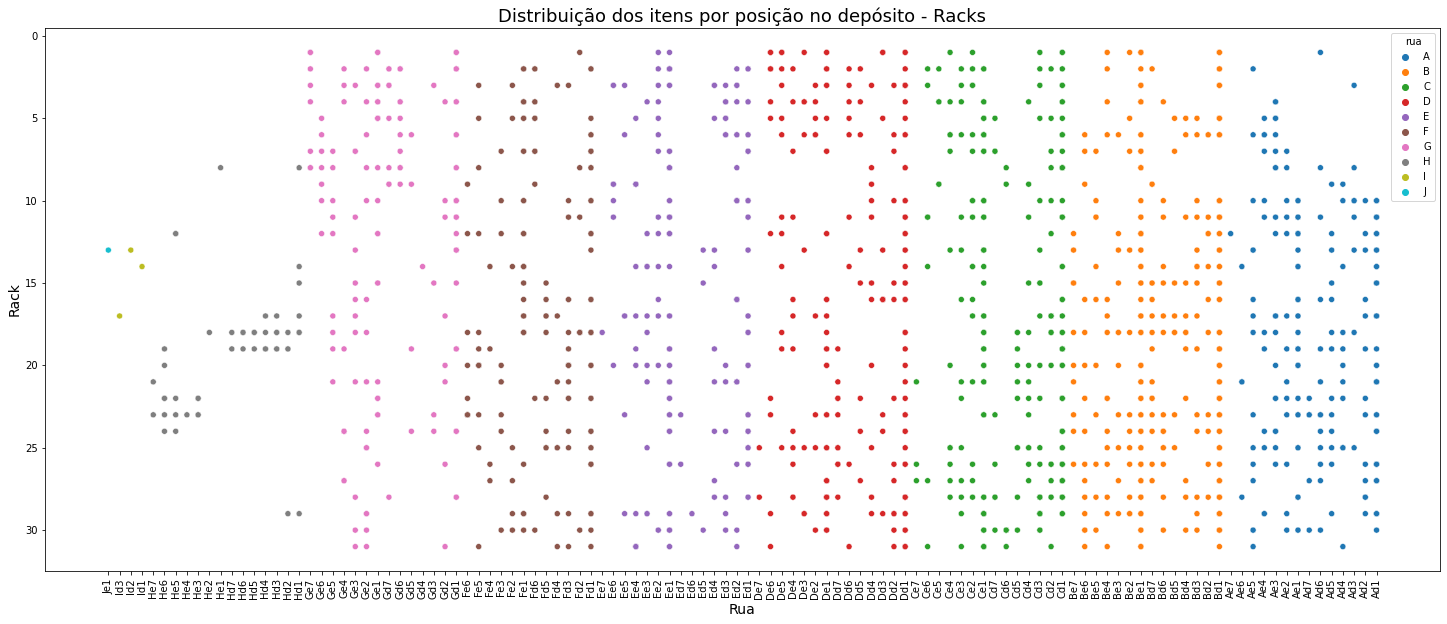

In [14]:
#ax = sns.scatterplot(data=analise_rack.query('curva_valor == "A"'), x='label', y='rack_visualizacao', hue='rua')
ax = sns.scatterplot(data=analise_rack.query('tipo_item == "shrink"'), x='label', y='rack_visualizacao', hue='rua')
#ax = sns.scatterplot(data=analise_rack.query('produto == "SZ0357"'), x='label', y='rack_visualizacao', hue='rua')
ax.figure.set_size_inches(25,10)
ax.set_title('Distribuição dos itens por posição no depósito - Racks', fontsize=18)
ax.set_xlabel('Rua', fontsize=14)
ax.set_ylabel('Rack', fontsize=14)
ax.invert_xaxis()
ax.invert_yaxis()
plt.xticks(rotation=90)
ax=ax

### Utilizando 'plotly'

In [15]:
ax = px.scatter(analise_rack.query('tipo_item == "shrink"'), x='label', y='rack_visualizacao', color='rua', height=700, title='Distribuição dos itens por posição no depósito - Racks')
ax.update_xaxes(title_text='Rua', title_font={'size':14}, autorange="reversed", showgrid=False)
ax.update_yaxes(title_text='Rack', title_font={'size':14}, autorange="reversed", showgrid=False)
ax.show()